#
    import data
    cleaning
    feature selc
    choose segmentation variables
    methods--(algo in classification -DBSCAN Kmeans, rfm)
    analysis of segmentation
    
    
    --- add if any required--

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [35]:
data.isnull()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64


In [13]:
# Convert date column to datetime
### may useful for Time Series Analysis

data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%Y/%m/%d')
data['not_happened_yet_date']

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: not_happened_yet_date, Length: 10148280, dtype: datetime64[ns]

In [ ]:
# Step 2: Feature Engineering

In [14]:
# Transaction Frequency
transaction_frequency = data['from_totally_fake_account'].value_counts()
transaction_frequency                       ## no.of trasactions done my user--- how many trasactions each user made

from_totally_fake_account
2331.0     2728
74448.0    2679
97033.0    2665
87324.0    2619
14877.0    2503
           ... 
30617.0     537
22078.0     524
68848.0     513
19964.0     504
55938.0     436
Name: count, Length: 8142, dtype: int64

In [19]:
## using sort
## transaction_frequency_sorted = transaction_frequency.sort_index()

In [21]:
# Total Transaction Amount
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()
total_transaction_amount         ## amount spent

from_totally_fake_account
1000.0      28698.51
1002.0      15622.97
1006.0      18778.19
1018.0      15612.21
1053.0      19444.57
              ...   
100931.0    22332.81
100934.0    18579.25
100947.0    20783.20
100986.0    15314.23
100988.0    19714.77
Name: monopoly_money_amount, Length: 8142, dtype: float64

In [23]:
# Transaction Types
transaction_types = data['to_randomly_generated_account'].unique()
transaction_types

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [25]:
transaction_types.shape   ### finding unique values

(14300,)

In [46]:
### its taking differnt diif.. before grouping

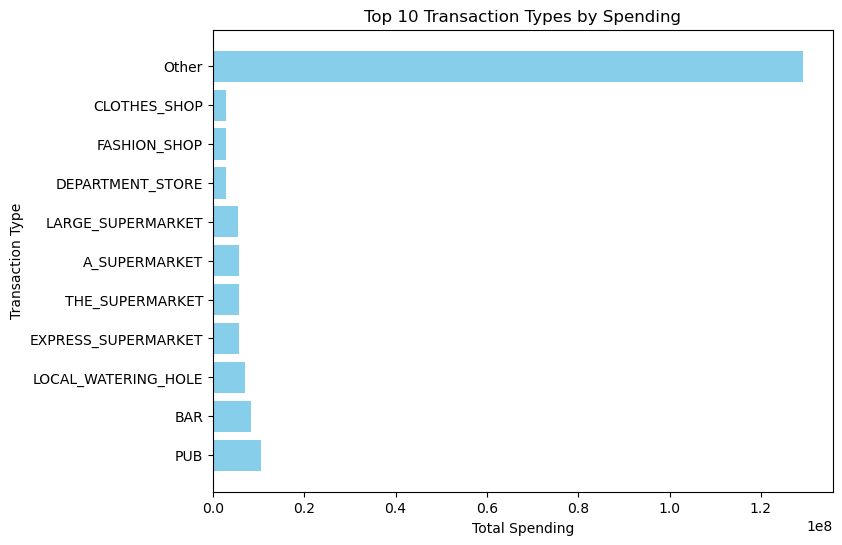

In [45]:
import matplotlib.pyplot as plt

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.barh(list(top_transaction_types) + ['Other'], list(total_spending[top_transaction_types]) + [other_spending], color='skyblue')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Type')
plt.title(f'Top {top_n} Transaction Types by Spending')
plt.show()


In [42]:
import plotly.graph_objects as go

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Create figure
fig = go.Figure()

# Add bar trace for top transaction types
fig.add_trace(go.Bar(
    x=list(top_transaction_types) + ['Other'],
    y=list(total_spending[top_transaction_types]) + [other_spending],
    marker_color='green'
))

# Update layout
fig.update_layout(
    title=f'Top {top_n} Transaction Types by Spending',
    xaxis_title='Transaction Type',
    yaxis_title='Total Spending'
)

# Show figure
fig.show()


In [47]:
## categorising

In [49]:
# Define keywords for grouping
transaction_keywords = {
    'coffee': ['CAFE', 'COFFEE_SHOP', 'A_CAFE', 'TOTALLY_A_REAL_COFFEE_SHOP', 'GOURMET_COFFEE_SHOP', 'HIPSTER_COFFEE_SHOP'],
    'restaurant': ['LOCAL_RESTAURANT', 'INDIAN_RESTAURANT', 'STEAK_HOUSE', 'SEAFOOD_RESAURANT'],
    'pub_bar': ['LOCAL_WATERING_HOLE', 'BAR', 'PUB', 'WHISKEY_BAR', 'COCKTAIL_BAR', 'G&T_BAR'],
    'shop': ['TOY_SHOP', 'COMIC_BOOK_SHOP', 'ELECTRONICS_SHOP', 'FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'SCHOOL_SUPPLY_STORE', 'LOCAL_BOOKSHOP', 'TRAINER_SHOP', 'BOOKSHOP', 'KIDS_ACTIVITY_CENTRE', 'VIDEO_GAME_STORE', 'CLOTHES_SHOP', 'TECH_SHOP', 'DIY_STORE', 'COOKSHOP', 'HOME_IMPROVEMENT_STORE', 'CHINESE_TAKEAWAY', 'SECOND_HAND_BOOKSHOP', 'GREENGROCER', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'KIDS_CLOTHING_SHOP', 'SPORT_SHOP', 'HIPSTER_ELECTRONICS_SHOP', 'CHINESE_RESTAURANT'],
    'entertainment': ['CINEMA', 'DVD_SHOP'],
    'supermarket': ['DEPARTMENT_STORE', 'LARGE_SUPERMARKET', 'EXPRESS_SUPERMARKET', 'A_SUPERMARKET', 'THE_SUPERMARKET'],
    'others': ['LUNCH_VAN', 'RESTAURANT_VOUCHER', 'ROASTERIE', 'LIQUOR_STORE', 'TO_BEAN_OR_NOT_TO_BEAN', 'WINE_CELLAR', 'WE_HAVE_BEAN_WEIGHTING', 'FLORIST', 'TURKEY_FARM']
}

# Function to assign category based on keywords
def assign_category(transaction):
    for category, keywords in transaction_keywords.items():
        for keyword in keywords:
            if keyword in transaction:
                return category
    return 'others'

# Apply the function to create a new column 'transaction_category'
data['transaction_category'] = data['to_randomly_generated_account'].apply(assign_category)

# Display the first few rows of the updated dataframe
print(data[['to_randomly_generated_account', 'transaction_category']].head(5))


  to_randomly_generated_account transaction_category
0                        CINEMA        entertainment
1                         40544               others
2                         85149               others
3           HIPSTER_COFFEE_SHOP               coffee
4                         18555               others


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Tokenize and lemmatize the transaction names
def tokenize_and_lemmatize(transaction):
    return transaction.lower().split()

# Convert transaction names to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lemmatize)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['to_randomly_generated_account'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to transactions
data['cluster_label'] = kmeans.labels_

# Evaluate clustering performance
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Display the first few rows of the updated dataframe with cluster labels
print(data[['to_randomly_generated_account', 'cluster_label']].head(25))